# Current population of Germany by Nationality

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import datetime

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [15, 12]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
filepath = os.path.join(path, 'datasets', 'Population Germany, reference date, nationality.csv')
df = pd.read_csv(filepath)

# Head and Tail

In [4]:
df.head()

,ReferenceDate,Germans,Foreigners,Total
0,1970-12-31,58263259,2737905,61001164
1,1971-12-31,58314646,3187857,61502503
2,1972-12-31,58255300,3554078,61809378
3,1973-12-31,58110017,3991352,62101369
4,1974-12-31,57940513,4050962,61991475


In [5]:
df.tail()

,ReferenceDate,Germans,Foreigners,Total
46,2016-12-31,73301664,9219989,82521653
47,2017-12-31,73113483,9678868,82792351
48,2018-12-31,72929921,10089292,83019213
49,2019-12-31,72768689,10398022,83166711
50,2020-12-31,72569978,10585053,83155031


In [6]:
df.shape                  

(51, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ReferenceDate  51 non-null     object
 1   Germans        51 non-null     int64 
 2   Foreigners     51 non-null     int64 
 3   Total          51 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [8]:
df['ReferenceDate'] = pd.to_datetime(df['ReferenceDate'])                      # convert ReferenceDate series to datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ReferenceDate  51 non-null     datetime64[ns]
 1   Germans        51 non-null     int64         
 2   Foreigners     51 non-null     int64         
 3   Total          51 non-null     int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.7 KB


# Data Transformation

In [9]:
df['Year'] = df['ReferenceDate'].dt.year                                        # extract year
df['Month'] = df['ReferenceDate'].dt.month                                      # extract month
df['Day'] = df['ReferenceDate'].dt.day                                          # extract day

df.head()

,ReferenceDate,Germans,Foreigners,Total,Year,Month,Day
0,1970-12-31,58263259,2737905,61001164,1970,12,31
1,1971-12-31,58314646,3187857,61502503,1971,12,31
2,1972-12-31,58255300,3554078,61809378,1972,12,31
3,1973-12-31,58110017,3991352,62101369,1973,12,31
4,1974-12-31,57940513,4050962,61991475,1974,12,31


In [10]:
df['GermansPctChg'] = df['Germans'].pct_change()                               # calculate percentage change of germans
df['ForeignersPctChg'] = df['Foreigners'].pct_change()                         # calculate percentage change of foreigners
df['OverallPctChg'] = df['Total'].pct_change()                                 # calculate overall percentage change

df.head()

,ReferenceDate,Germans,Foreigners,Total,Year,Month,Day,GermansPctChg,ForeignersPctChg,OverallPctChg
0,1970-12-31,58263259,2737905,61001164,1970,12,31,NaN,NaN,NaN
1,1971-12-31,58314646,3187857,61502503,1971,12,31,0.000882,0.164342,0.008219
2,1972-12-31,58255300,3554078,61809378,1972,12,31,-0.001018,0.114880,0.004990
3,1973-12-31,58110017,3991352,62101369,1973,12,31,-0.002494,0.123034,0.004724
4,1974-12-31,57940513,4050962,61991475,1974,12,31,-0.002917,0.014935,-0.001770


In [11]:
df1 = df.iloc[:, [0, 4, 5, 6,1, 7, 2, 8, 3, 9]]                                 # change the column order 
df1.head()

,ReferenceDate,Year,Month,Day,Germans,GermansPctChg,Foreigners,ForeignersPctChg,Total,OverallPctChg
0,1970-12-31,1970,12,31,58263259,NaN,2737905,NaN,61001164,NaN
1,1971-12-31,1971,12,31,58314646,0.000882,3187857,0.164342,61502503,0.008219
2,1972-12-31,1972,12,31,58255300,-0.001018,3554078,0.114880,61809378,0.004990
3,1973-12-31,1973,12,31,58110017,-0.002494,3991352,0.123034,62101369,0.004724
4,1974-12-31,1974,12,31,57940513,-0.002917,4050962,0.014935,61991475,-0.001770


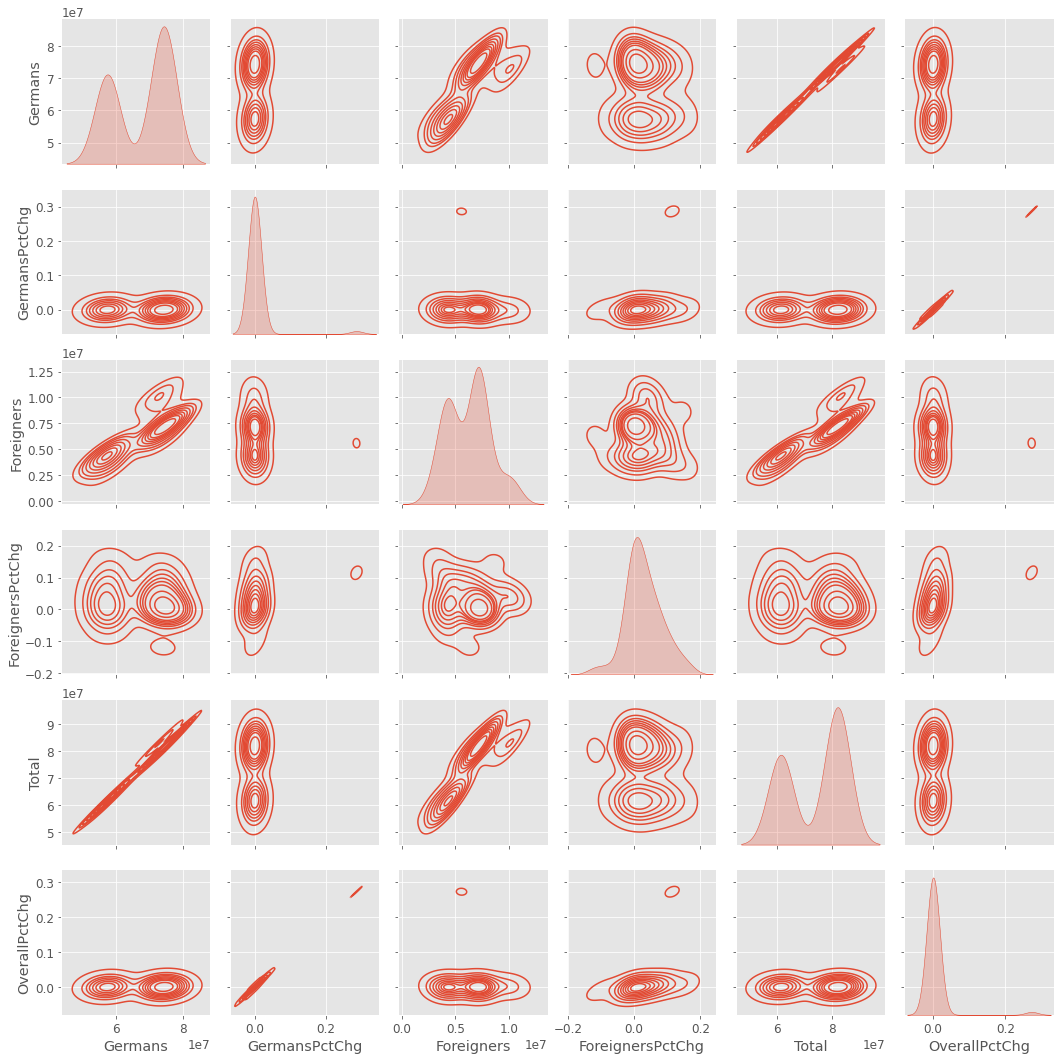

In [12]:
sns.pairplot(df1.drop(columns=['ReferenceDate',	'Year',	'Month',	'Day']), kind='kde')

# Missing Values Exploration

In [13]:
df1.isna().sum()

ReferenceDate       0
Year                0
Month               0
Day                 0
Germans             0
GermansPctChg       1
Foreigners          0
ForeignersPctChg    1
Total               0
OverallPctChg       1
dtype: int64

<AxesSubplot:>

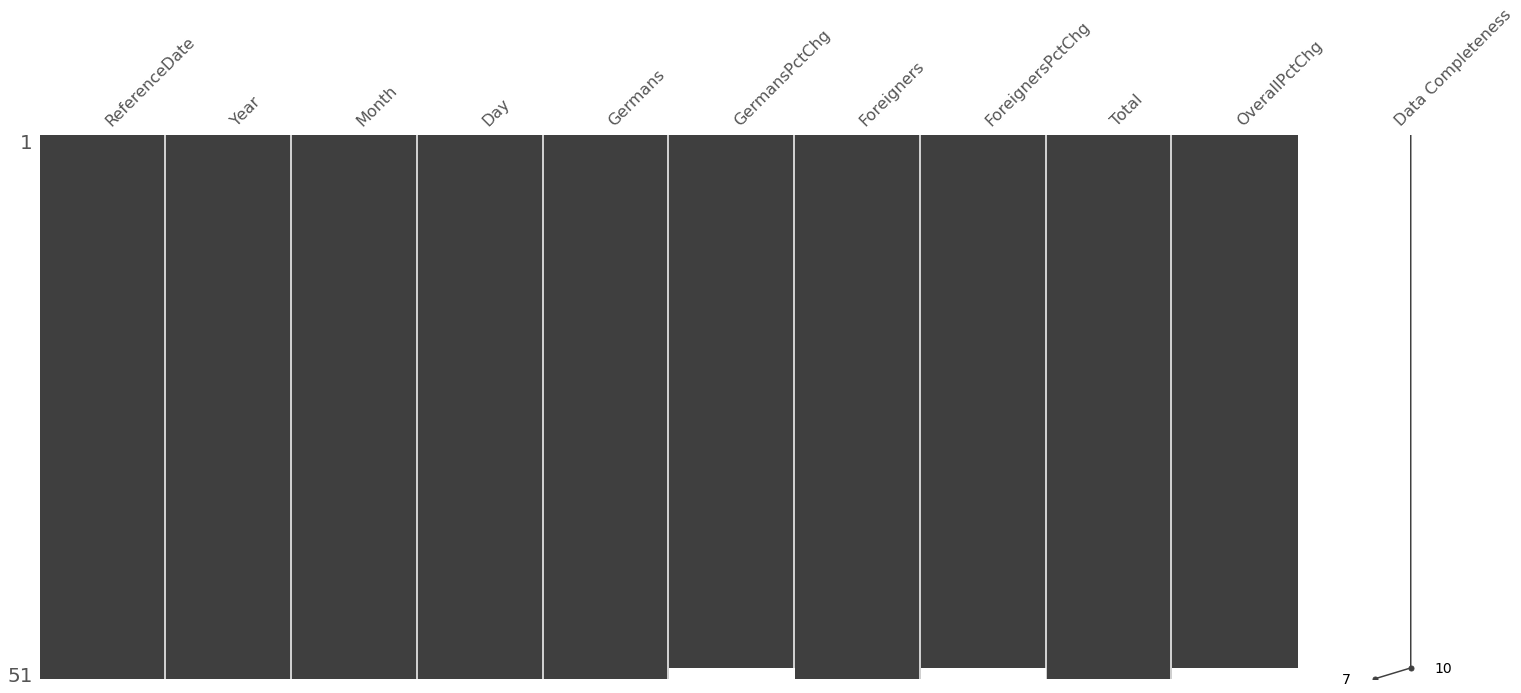

In [14]:
msno.matrix(df1, labels=True, sort='descending')

# Data Visualization

In [15]:
from matplotlib.ticker import FuncFormatter

# helper function for formatting plot y-axis
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

format_mill = FuncFormatter(millions)


def percentage(x, pos):
    'The two args are the value and tick position'
    return '%1.2f%%' % (x * 1)

format_pct = FuncFormatter(percentage)

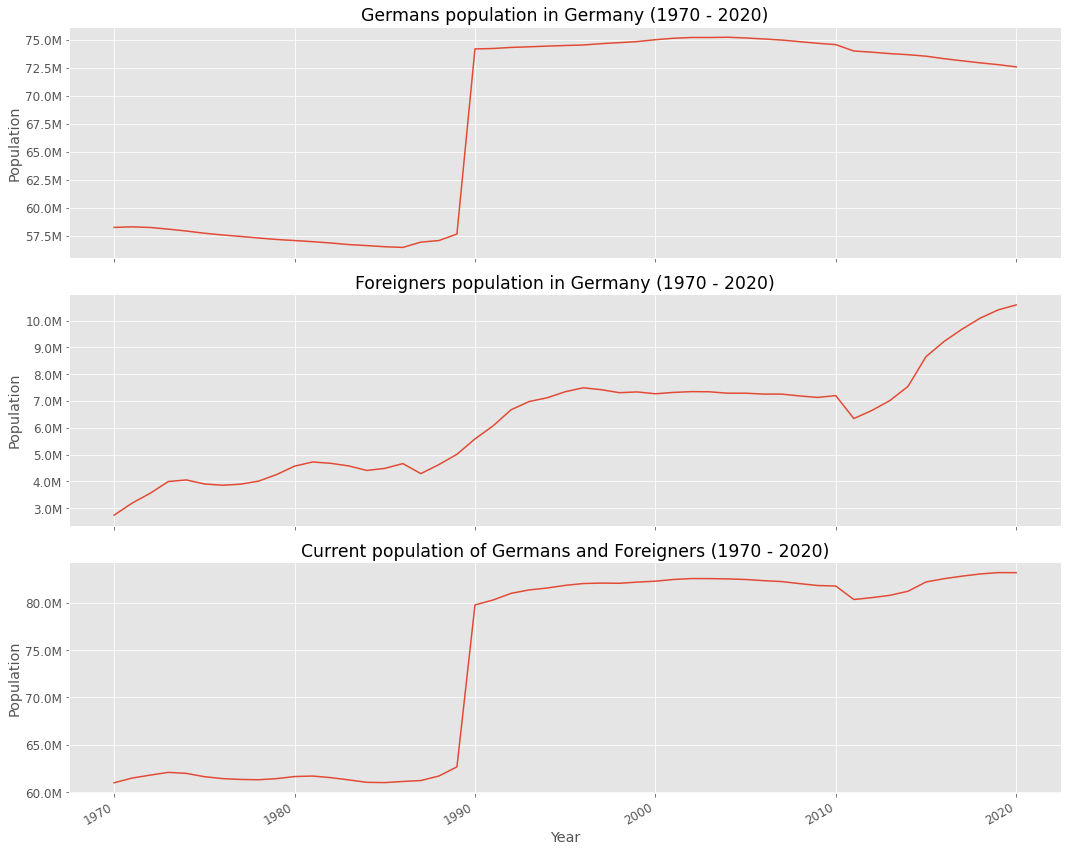

In [16]:
# create figure and axis
fig, axs = plt.subplots(3, 1, sharex=True)
fig.autofmt_xdate()

# plot germans population
sns.lineplot(x='Year', y='Germans', data=df1, ax=axs[0])
axs[0].set(title='Germans population in Germany (1970 - 2020)', xlabel='Year', ylabel='Population')

# plot foreigners population
sns.lineplot(x='Year', y='Foreigners', data=df1, ax=axs[1])
axs[1].set(title='Foreigners population in Germany (1970 - 2020)', xlabel='Year', ylabel='Population')

# plot total population
sns.lineplot(x='Year', y='Total', data=df1, ax=axs[2])
axs[2].set(title='Current population of Germans and Foreigners (1970 - 2020)', xlabel='Year', ylabel='Population')

# set y-axis major formatter
for ax in axs:
    ax.yaxis.set_major_formatter(format_mill)

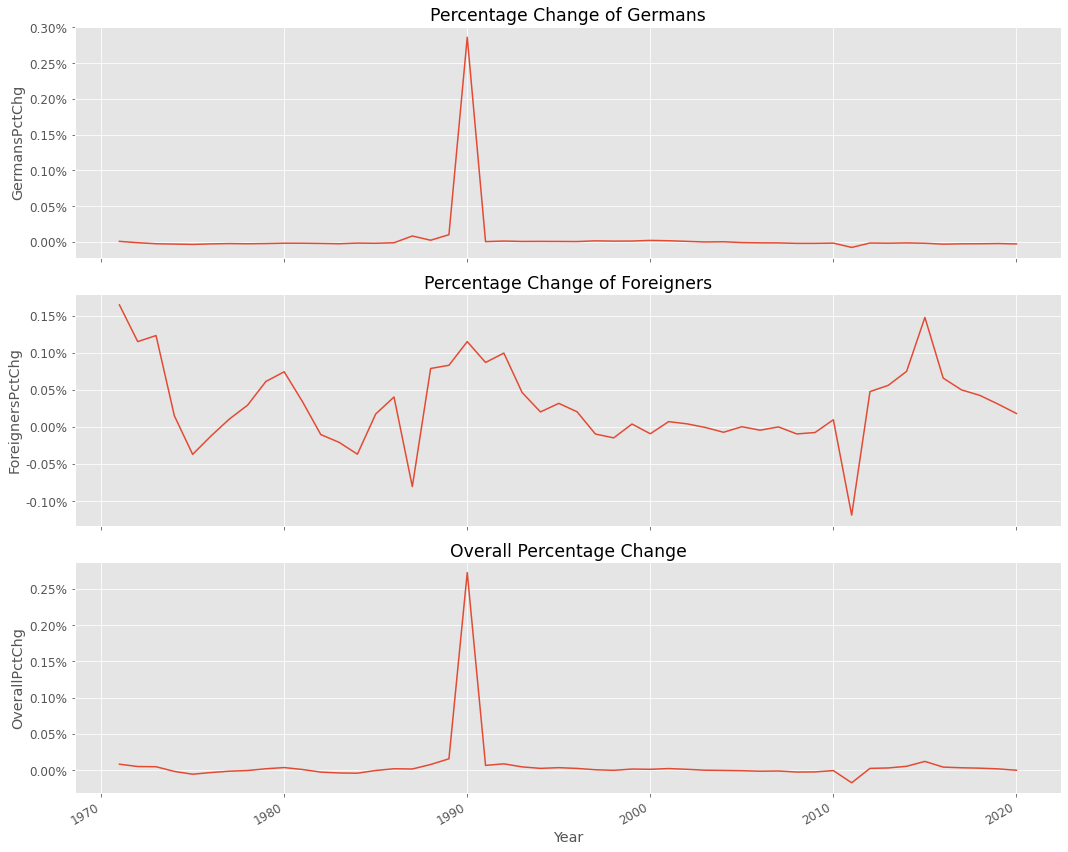

In [17]:
# create figure and axis
fig, axs = plt.subplots(3, 1, sharex=True)
fig.autofmt_xdate()


sns.lineplot(x='Year', y='GermansPctChg', data=df1, ax=axs[0])
axs[0].set(title='Percentage Change of Germans')


sns.lineplot(x='Year', y='ForeignersPctChg', data=df1, ax=axs[1])
axs[1].set(title='Percentage Change of Foreigners')


sns.lineplot(x='Year', y='OverallPctChg', data=df1, ax=axs[2])
axs[2].set(title='Overall Percentage Change')


# set y-axis major formatter
for ax in axs:
    ax.yaxis.set_major_formatter(format_pct)